In [2]:
from IPython.core.display import display, HTML
display(HTML(
"""<style>
div.container { width:100% !important; }
div.CodeMirror {font-family: Consolas; font-size: 16pt;}
div.output { font-size: 16pt; font-weight: bold;}
div.input { font-family: Consolas; font-size: 16pt;}
div.prompt { min-width: 100px;}
</style>
"""))

# 예제 데이터셋 생성

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format="retina"

In [4]:
from sklearn.datasets import make_classification

In [5]:
X, y = make_classification(n_samples=20, n_features=2, 
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1,
                           n_classes=2, random_state=123)

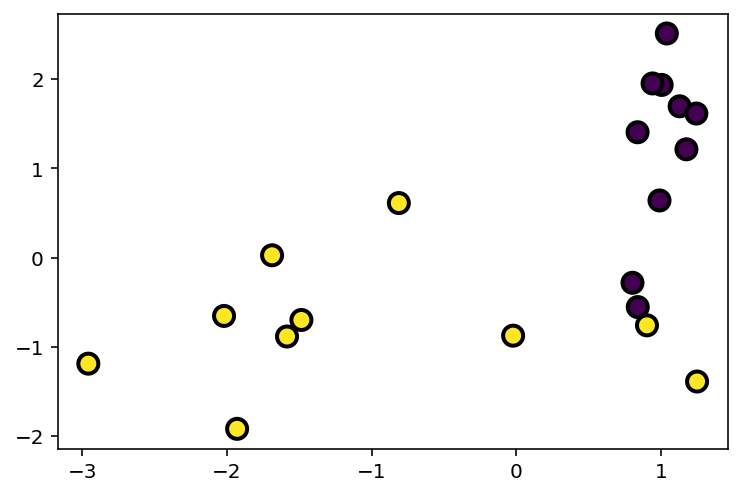

In [6]:
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100,
            edgecolors='k', linewidths=2)
plt.show()

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init="random", verbose=1)
model.fit(X)

Initialization complete
Iteration 0, inertia 86.74554636104395
Iteration 1, inertia 53.771035655337
Iteration 2, inertia 32.04485400048793
Iteration 3, inertia 29.1746276915693
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 41.6458106690138
Iteration 1, inertia 28.016427448880773
Iteration 2, inertia 27.34154652643695
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 63.97870553515067
Iteration 1, inertia 42.574516416038406
Iteration 2, inertia 29.790474296581557
Iteration 3, inertia 29.1746276915693
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 68.57821043930954
Iteration 1, inertia 28.717327640365603
Iteration 2, inertia 28.08659976426305
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 44.10010227841666
Iteration 1, inertia 28.66313273337505
Iteration 2, inertia 27.34154652643695
Converged at iteration 2: strict c

KMeans(init='random', n_clusters=2, verbose=1)

In [8]:
model.cluster_centers_

array([[ 1.01138251,  0.83200493],
       [-1.56258716, -0.69768199]])

In [9]:
pred=model.predict(X)

In [10]:
pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0],
      dtype=int32)

In [11]:
c0, c1 = model.cluster_centers_

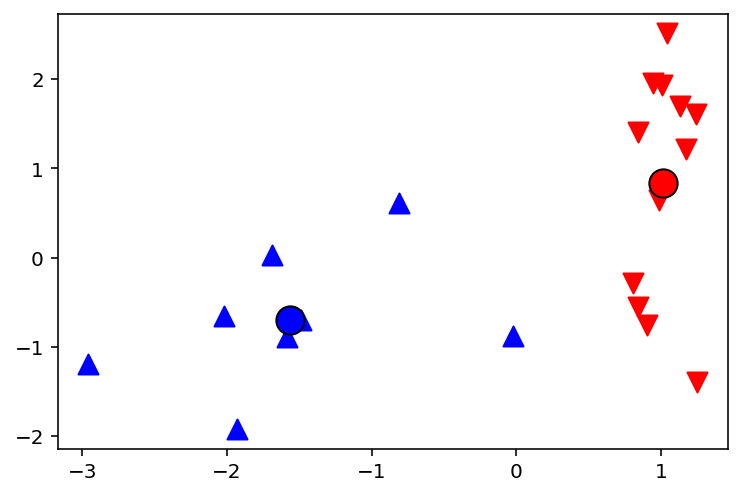

In [12]:
plt.scatter(x=X[model.labels_==0, 0], 
            y=X[model.labels_==0, 1], 
            s=100, marker='v', c='r')
plt.scatter(x=X[model.labels_==1, 0], 
            y=X[model.labels_==1, 1], 
            s=100, marker='^', c='b')
plt.scatter(x=c0[0], y=c0[1], 
            s=200, marker='o', edgecolors='k', c='r')
plt.scatter(x=c1[0], y=c1[1], 
            s=200, marker='o', edgecolors='k', c='b')
plt.show()

In [13]:
c0

array([1.01138251, 0.83200493])

In [14]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data=np.c_[X, 
                             np.linalg.norm(X-c0, axis=1), 
                             np.linalg.norm(X-c1, axis=1), 
                             model.labels_],
                  columns=["X0", "X1", "d0", "d1", "class"])

In [15]:
df.head()

,X0,X1,d0,d1,class
0,1.038596,2.511754,1.679969,4.131178,0.0
1,1.002714,1.935215,1.103245,3.675992,0.0
2,-1.688105,0.025994,2.817248,0.734481,1.0
3,0.901344,-0.758966,1.594771,2.464693,0.0
4,0.836531,1.404882,0.598967,3.190070,0.0


In [16]:
df.sort_values(by="d0").head()

,X0,X1,d0,d1,class
18,0.987862,0.640604,0.192841,2.880243,0.0
19,1.173804,1.213799,0.414907,3.337903,0.0
4,0.836531,1.404882,0.598967,3.190070,0.0
12,1.242322,1.614617,0.815975,3.635140,0.0
9,1.126947,1.695701,0.871393,3.600260,0.0


In [17]:
df.sort_values(by="d1").head()

,X0,X1,d0,d1,class
13,-1.485548,-0.698910,2.928884,0.077049,1.0
16,-1.584917,-0.884256,3.112286,0.187905,1.0
17,-2.019738,-0.653506,3.375564,0.459280,1.0
2,-1.688105,0.025994,2.817248,0.734481,1.0
7,-1.929572,-1.918940,4.027023,1.275206,1.0


In [18]:
def plot_cluster(model, data):
    c0, c1 = model.cluster_centers_
    plt.scatter(x=X[model.labels_==0, 0], 
                y=X[model.labels_==0, 1], 
                s=100, marker='v', c='r')
    plt.scatter(x=X[model.labels_==1, 0], 
                y=X[model.labels_==1, 1], 
                s=100, marker='^', c='b')
    plt.scatter(x=c0[0], y=c0[1], 
                s=200, marker='o', edgecolors='k', c='r')
    plt.scatter(x=c1[0], y=c1[1], 
                s=200, marker='o', edgecolors='k', c='b')

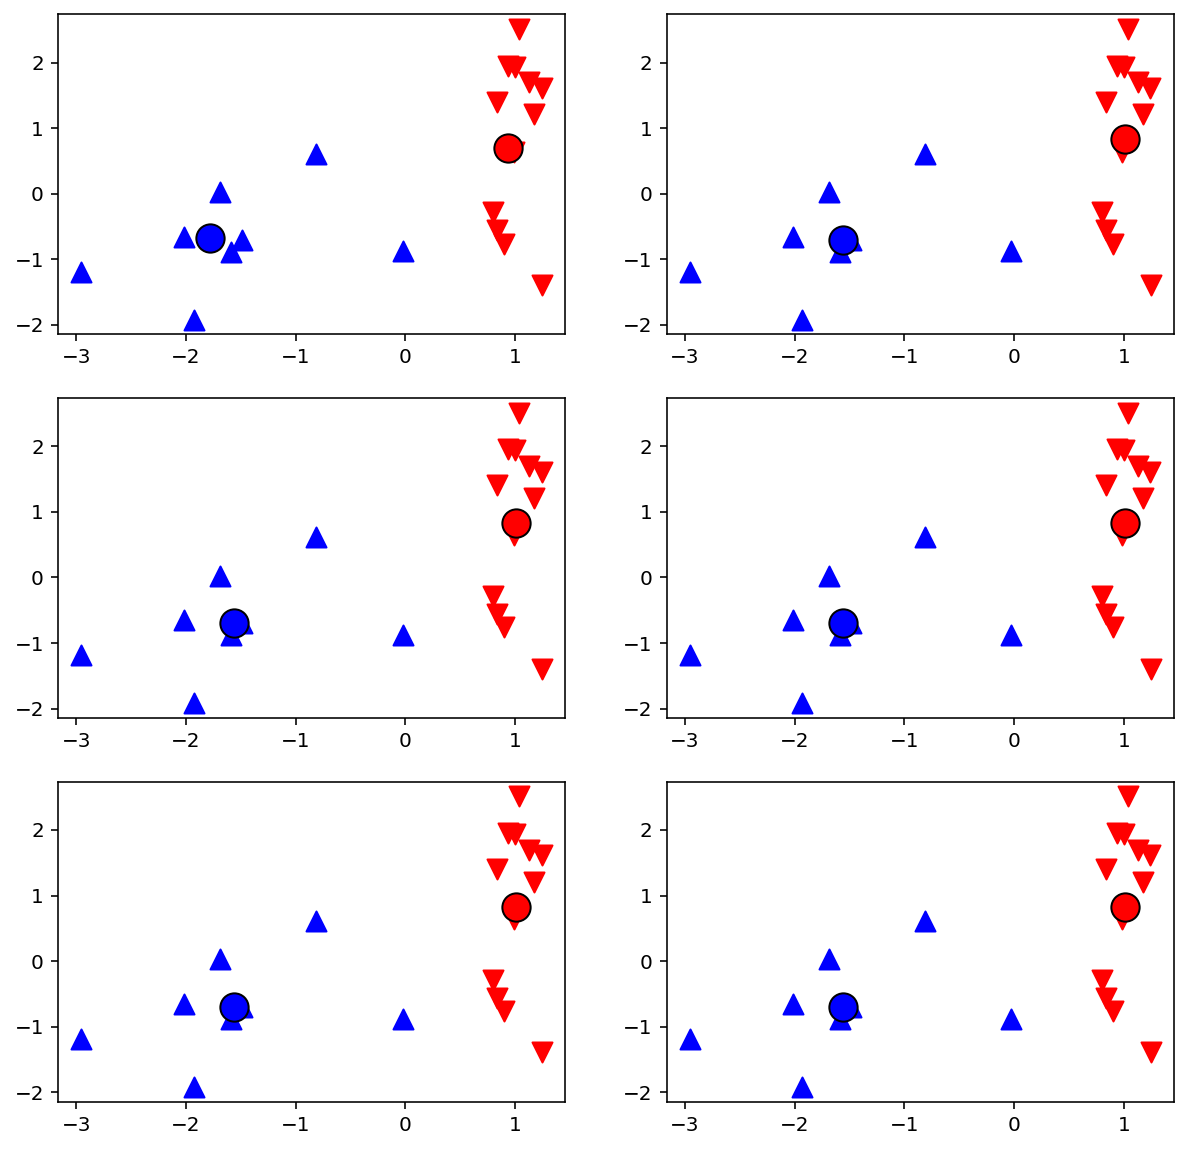

In [19]:
plt.figure(figsize=(10,10))
for i in range(6):
    model = KMeans(n_clusters=2, init="random",
                   n_init=1, max_iter=(i+1), 
                   random_state=1)
    model.fit(X)
    plt.subplot(3,2,(i+1))
    plot_cluster(model, X)

In [20]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [21]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
le.fit(iris.species)
iris["species"] = le.transform(iris.species)

In [23]:
iris.species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [24]:
# 계층적 군집분석 (bottom_up 거리 기준으로 묶어준다.)
from scipy.cluster.hierarchy import linkage # 계층적 군집 실시. 
cluster_model = linkage(iris, method="complete")
# method='complete' >> 완전연결법 

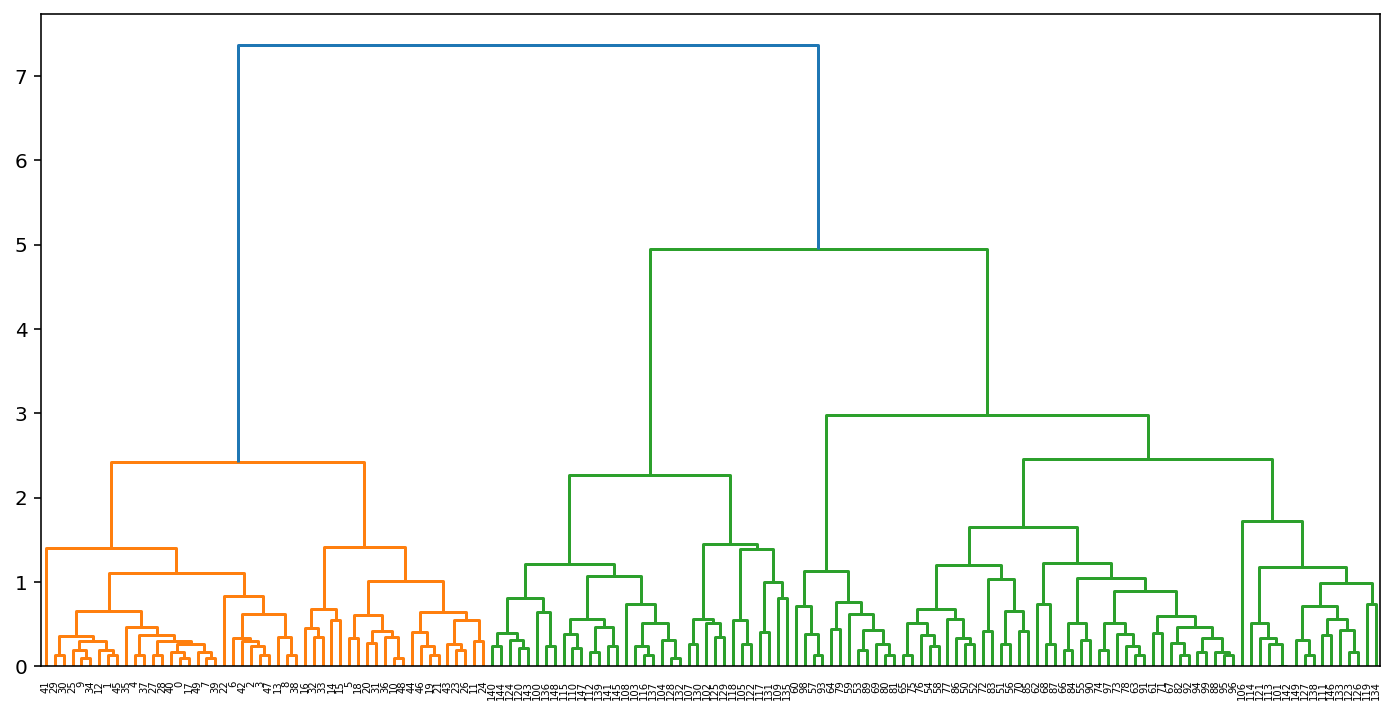

In [25]:
from scipy.cluster.hierarchy import dendrogram 
plt.figure(figsize=(12,6)) 
dendrogram(cluster_model, labels=iris.index)
plt.show()

In [26]:
from scipy.cluster.hierarchy import linkage
cluster_model = linkage(iris, method="complete")

In [27]:
from scipy.cluster.hierarchy import fcluster
fcluster(cluster_model, 4, criterion="distance")

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [28]:
 fcluster(cluster_model, 2, criterion="distance")

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 3, 7, 4, 3, 3, 4, 7, 4, 3, 4,
       3, 7, 3, 7, 7, 3, 3, 4, 4, 7, 3, 7, 4, 7, 3, 4, 7, 7, 3, 4, 4, 4,
       3, 7, 7, 4, 3, 3, 7, 3, 3, 3, 7, 3, 3, 3, 7, 3, 3, 7], dtype=int32)

In [29]:
# y=4로 군집 예측 
from scipy.cluster.hierarchy import fcluster 
predict = fcluster(cluster_model, 4, criterion='distance')

In [30]:
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [31]:
predict-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [32]:
np.choose((predict-1),([0,2,1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [33]:
import numpy as np
adjusted_pred = np.choose((predict-1), [0, 2, 1])
adjusted_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [34]:
le.inverse_transform(adjusted_pred)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [35]:
import pandas as pd
pred_name = le.inverse_transform(adjusted_pred)
origin_name = le.inverse_transform(iris.species.values)
pd.crosstab(origin_name, pred_name,
            rownames=["True"], 
            colnames=["Predicted"], 
            margins=True)

Predicted,setosa,versicolor,virginica,All
True,,,,
setosa,50,0,0,50
versicolor,0,50,0,50
virginica,0,16,34,50
All,50,66,34,150


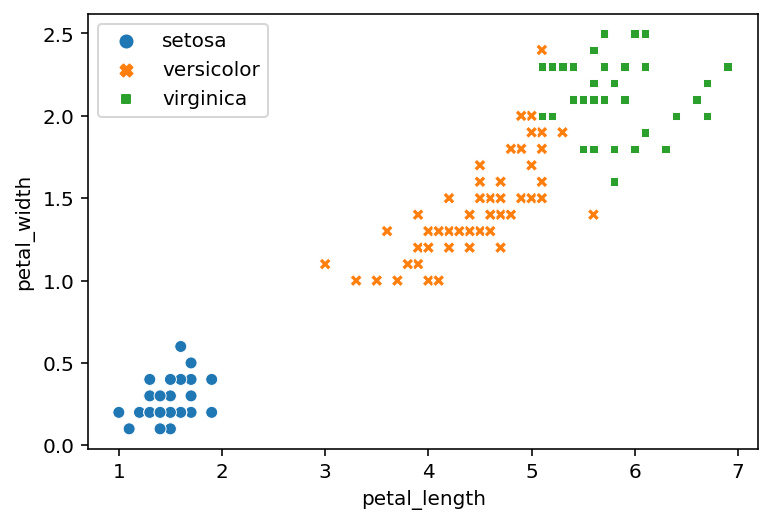

In [36]:
sns.scatterplot(x="petal_length", y="petal_width", data=iris,
                hue=pred_name, style=pred_name)

In [37]:
import numpy as np
np.random.seed(0)
group0 = np.random.normal(-10, 2, (10,2))
class0 = np.full(group0.shape[0], 0) 
group0 = np.c_[group0, class0]

In [38]:
group1 = np.random.normal(10, 2, (10,2))
class1 = np.full(group1.shape[0], 1)
group1 = np.c_[group1, class1]

In [39]:
group2 = np.random.normal(0, 5, (100,2))
class2 = np.full(group2.shape[0], 2)
group2 = np.c_[group2, class2]

In [40]:
data = np.r_[group0, group1, group2]
data


array([[ -6.47189531,  -9.19968558,   0.        ],
       [ -8.04252403,  -5.5182136 ,   0.        ],
       [ -6.26488402, -11.95455576,   0.        ],
       [ -8.09982316, -10.30271442,   0.        ],
       [-10.2064377 ,  -9.178803  ,   0.        ],
       [ -9.71191286,  -7.09145299,   0.        ],
       [ -8.47792455,  -9.75664997,   0.        ],
       [ -9.11227353,  -9.33265135,   0.        ],
       [ -7.01184185, -10.41031653,   0.        ],
       [ -9.3738646 , -11.70819148,   0.        ],
       [  4.89402037,  11.30723719,   1.        ],
       [ 11.7288724 ,   8.51566996,   1.        ],
       [ 14.53950925,   7.09126865,   1.        ],
       [ 10.09151703,   9.6256323 ,   1.        ],
       [ 13.06555843,  12.93871754,   1.        ],
       [ 10.30989485,  10.75632504,   1.        ],
       [  8.2244285 ,   6.03840706,   1.        ],
       [  9.3041757 ,  10.31269794,   1.        ],
       [ 12.46058136,  12.4047597 ,   1.        ],
       [  9.22534637,   9.39539

<ipython-input-41-ac73935940aa>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  marker='o', c=data[:, 2].astype(np.int), s=100,


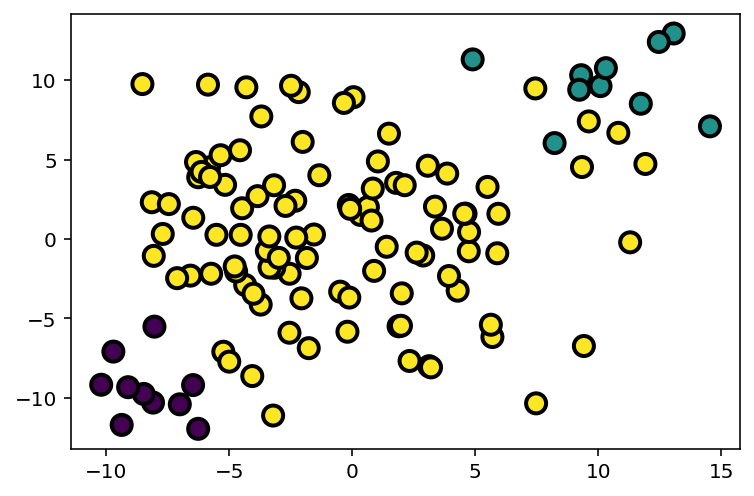

In [41]:
plt.scatter(x=data[:, 0], y=data[:, 1], 
            marker='o', c=data[:, 2].astype(np.int), s=100, 
            edgecolor="k", linewidth=2)
plt.show()

In [42]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init="random")
model.fit(data[:, 0:2])

KMeans(init='random', n_clusters=3)

In [43]:
model.cluster_centers_

array([[ 7.93234415,  5.526175  ],
       [-2.11638402, -5.40013046],
       [-3.23795138,  3.79797742]])

In [44]:
pred = model.predict(data[:, 0:2])
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2,
       2, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 2], dtype=int32)

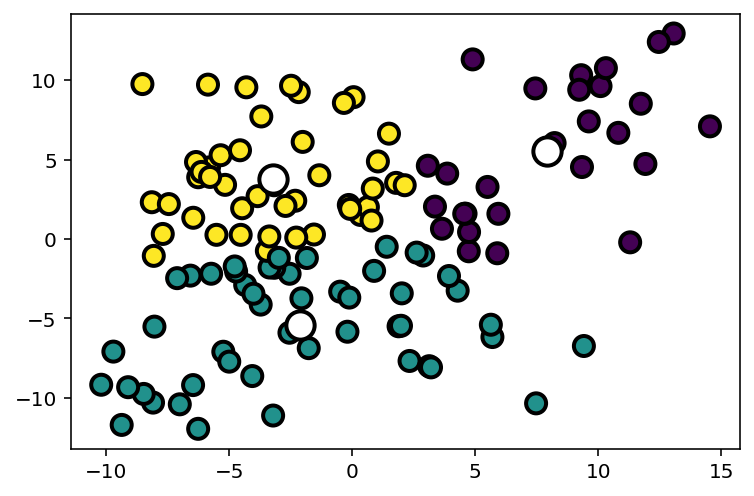

In [45]:
c = model.cluster_centers_
plt.scatter(x=data[:,0], y=data[:,1], c=pred,
            s=100, edgecolor="k", linewidth=2)
plt.scatter(x=c[:,0], y=c[:,1], s=200, c='w', edgecolor='k', linewidth=2)
plt.show()

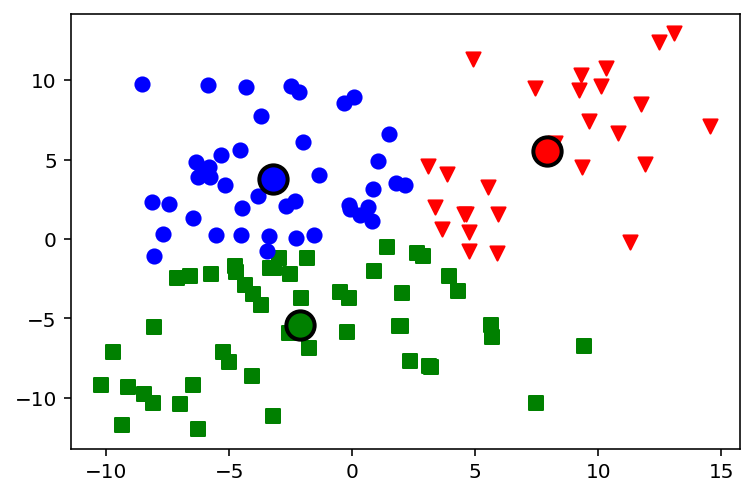

In [46]:
c0, c1, c2 = model.cluster_centers_
plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
            s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
            s=50, marker='s', c='g')
plt.scatter(x=data[model.labels_==2, 0], y=data[model.labels_==2, 1],
            s=50, marker='o', c='b')
plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolor='k', linewidth=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolor='k', linewidth=2)
plt.scatter(x=c2[0], y=c2[1], s=200, c='b', edgecolor='k', linewidth=2)
plt.show()

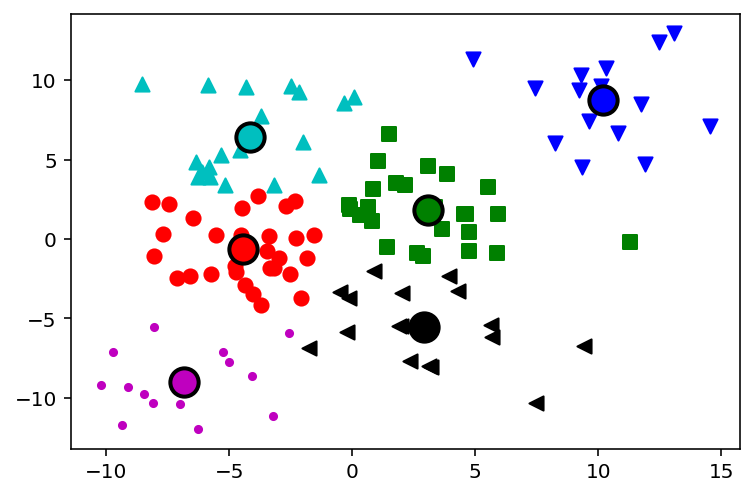

In [47]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, init="random")
model.fit(data[:, 0:2])

centers = model.cluster_centers_
colors = ['r', 'g', 'b', 'c', 'm', 'k']
markers = ['o', 's', 'v', '^', '.', '<']
for i, c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i, 0], y=data[model.labels_==i, 1],
                s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c=colors[i], edgecolor='k', linewidth=2)
plt.show()

In [48]:
import numpy as np
np.random.seed(0)
group0 = np.random.normal(13, 0.5, (50,2))
class0 = np.full(group0.shape[0], 0)
group0 = np.c_[group0, class0]

group1 = np.random.normal(10, 1.5, (50,2))
class1 = np.full(group1.shape[0], 1)
group1 = np.c_[group1, class1]

group2 = np.random.normal(0, 5, (50,2))
class2 = np.full(group2.shape[0], 2)
group2 = np.c_[group2, class2]

data = np.r_[group0, group1, group2]

<ipython-input-49-f8979a15f0a5>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  marker='o', c=data[:, 2].astype(np.int), s=100,


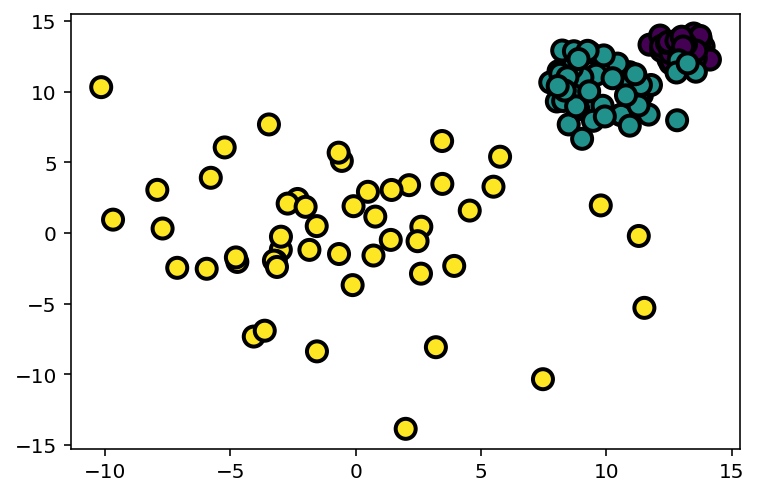

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=data[:, 0], y=data[:, 1], 
            marker='o', c=data[:, 2].astype(np.int), s=100, 
            edgecolor="k", linewidth=2)
plt.show()

In [50]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init="random")
model.fit(data[:, 0:2])

KMeans(init='random', n_clusters=3)

In [51]:
pred = model.predict(data[:, 0:2])

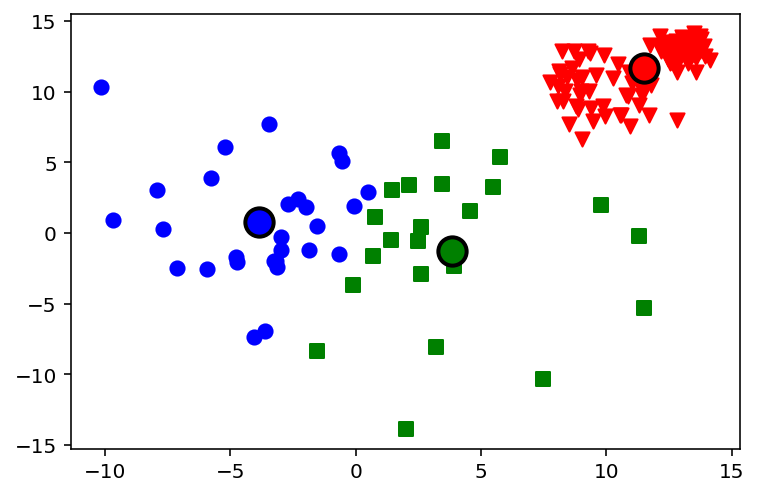

In [52]:
c0, c1, c2 = model.cluster_centers_
plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
            s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
            s=50, marker='s', c='g')
plt.scatter(x=data[model.labels_==2, 0], y=data[model.labels_==2, 1],
            s=50, marker='o', c='b')
plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolor='k', linewidth=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolor='k', linewidth=2)
plt.scatter(x=c2[0], y=c2[1], s=200, c='b', edgecolor='k', linewidth=2)
plt.show()

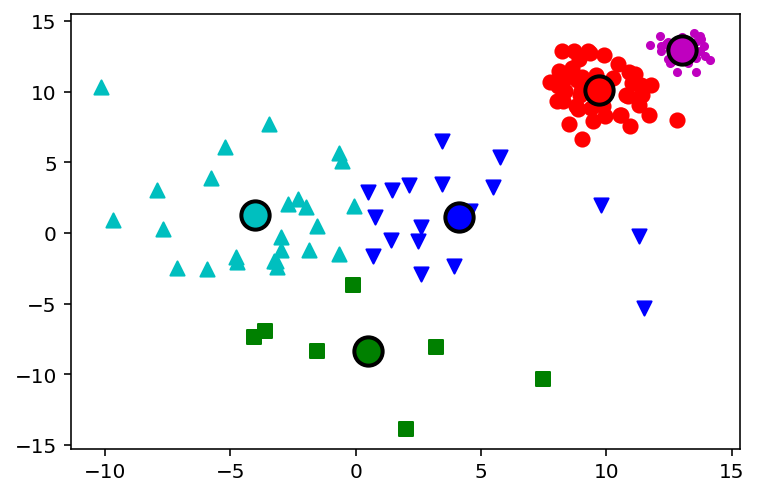

In [53]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, init="random")
model.fit(data[:, 0:2])
centers = model.cluster_centers_
colors = ['r', 'g', 'b', 'c', 'm']
markers = ['o', 's', 'v', '^', '.']
for i, c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i, 0], y=data[model.labels_==i, 1],
                s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, 
                c=colors[i], edgecolor='k', linewidth=2)
plt.show()

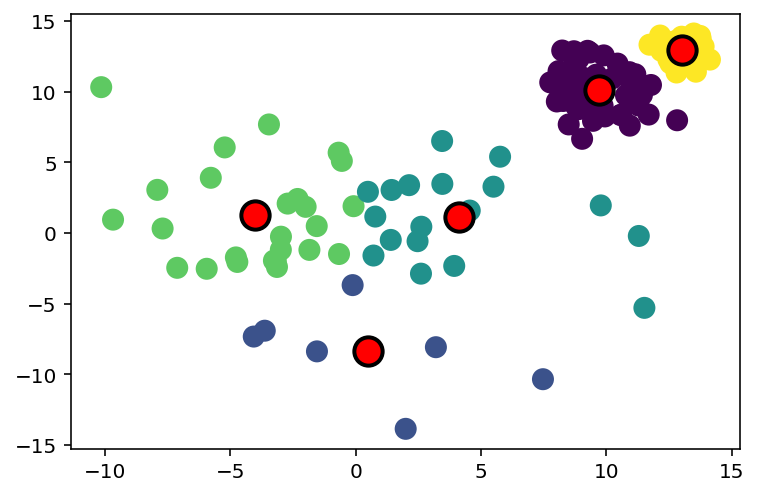

In [54]:
pred = model.predict(data[:,0:2])
c = model.cluster_centers_
plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100)
plt.scatter(x=c[:,0], y=c[:,1], s=200, c='r', edgecolor='k', linewidth=2)
plt.show()

In [55]:
import numpy as np
np.random.seed(0)
X1 = np.random.rand(200)*3
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1) + noise

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise

group1 = np.c_[X1, Y1, np.full(X1.shape[0], 0)]
group2 = np.c_[X2, Y2, np.full(X2.shape[0], 1)]
data = np.r_[group1, group2]

<ipython-input-56-7e5da246e714>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=data[:, 2].astype(np.int),


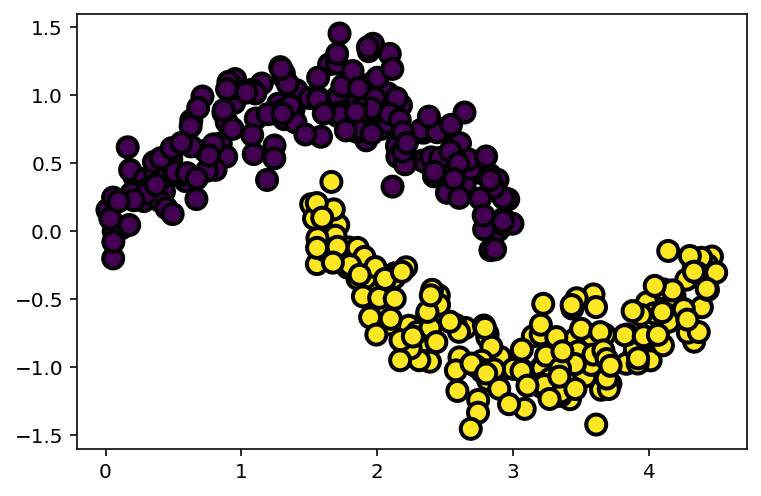

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x=data[:, 0], y=data[:, 1], marker='o', 
            c=data[:, 2].astype(np.int),
            s=100, edgecolor="k", linewidth=2)
plt.show()

In [57]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init="random")
model.fit(data[:, 0:2])

KMeans(init='random', n_clusters=2)

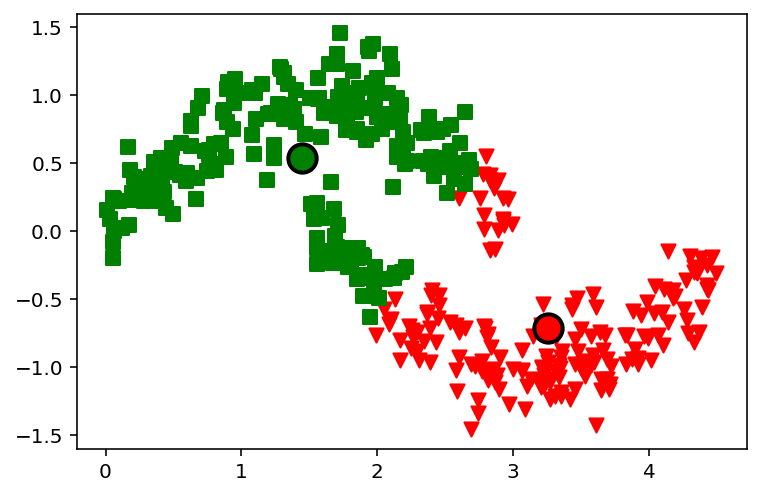

In [58]:
c0, c1 = model.cluster_centers_
plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
            s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
            s=50, marker='s', c='g')
plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolor='k', linewidth=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolor='k', linewidth=2)
plt.show()

In [59]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7, init="random", random_state=2)
model.fit(data[:, 0:2])

KMeans(init='random', n_clusters=7, random_state=2)

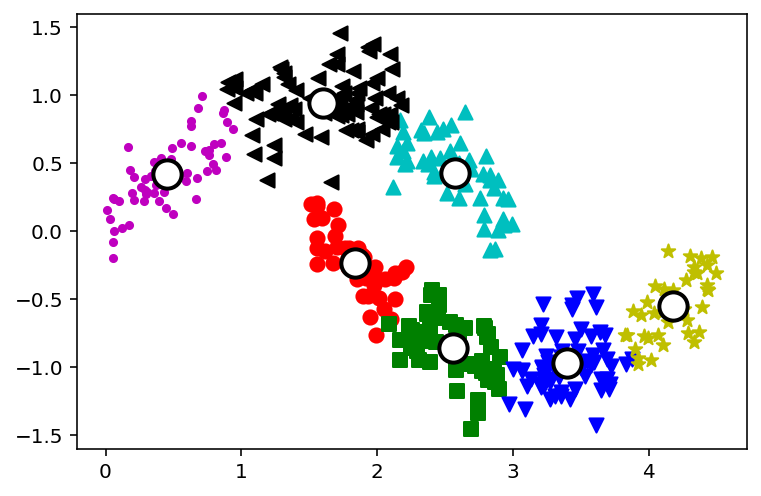

In [60]:
center = model.cluster_centers_
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
markers = ['o', 's', 'v', '^', '.', '*', '<']

for i, c in enumerate(center):
    plt.scatter(x=data[model.labels_==i, 0], y=data[model.labels_==i, 1],
                s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c='w', edgecolor='k', linewidth=2)
plt.show()

# 실루엣 계수

In [61]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters, random_state=2)
    cluster_labels = model.fit_predict(data[:, :-1])
    score = silhouette_score(data[:, :-1], cluster_labels)
    print("클러스터 수: {}, 실루엣 계수: {}".format(n_clusters, score))

    # 일반적으로 실루엣 계수 0.5 이상이면 좋은 수치로 판단. 

클러스터 수: 2, 실루엣 계수: 0.533235774308134
클러스터 수: 3, 실루엣 계수: 0.4701230677079941
클러스터 수: 4, 실루엣 계수: 0.4732502498237369
클러스터 수: 5, 실루엣 계수: 0.45962085906799105
클러스터 수: 6, 실루엣 계수: 0.4982709514883017
클러스터 수: 7, 실루엣 계수: 0.5027363876263838
클러스터 수: 8, 실루엣 계수: 0.4918697936848559
클러스터 수: 9, 실루엣 계수: 0.47303667875323785
클러스터 수: 10, 실루엣 계수: 0.4504109748038108


In [62]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris_X = iris.iloc[:, :-1]
iris_y = iris.species
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [63]:
from sklearn.cluster import KMeans
iris_cluster_model = KMeans(n_clusters=3, random_state=1)
iris_cluster_model.fit(iris_X)

KMeans(n_clusters=3, random_state=1)

In [64]:
import numpy as np
pred = np.choose(iris_cluster_model.labels_, [1, 0, 2])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris.species)
pred_str = le.inverse_transform(pred)

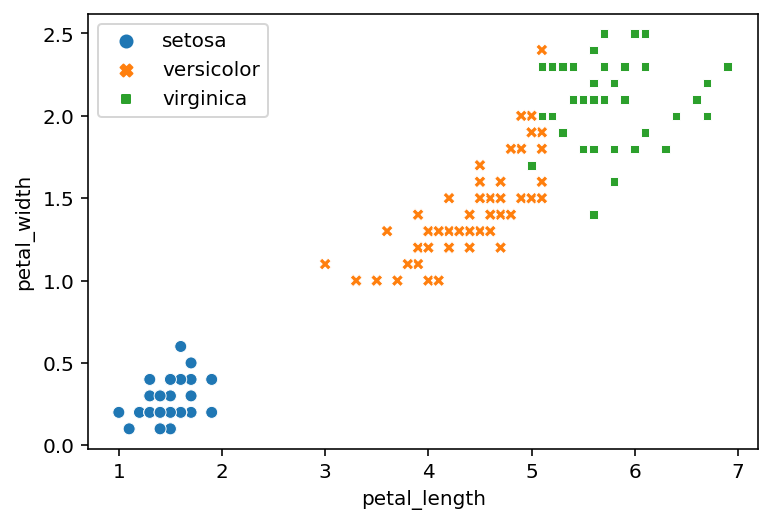

In [66]:
ax = sns.scatterplot(x="petal_length", y="petal_width", hue=pred_str,
                     style=pred_str, data=iris)

In [67]:
def rand_index(labels_true, labels_pred):
    n = len(labels_true)
    a, b = 0, 0
    for i in range(n):
        for j in range(i+1, n):
            if (labels_true[i] == labels_true[j]) & (labels_pred[i] == labels_pred[j]):
                a +=1
            elif (labels_true[i] != labels_true[j]) & (labels_pred[i] != labels_pred[j]):
                b +=1
            else:
                pass
    RI = (a + b) / (n*(n-1)/2)
    return RI

In [68]:
rand_index(labels_true=iris.species, labels_pred=predict)

0.8797315436241611

In [69]:
iris_cluster_model = KMeans(n_clusters=2, random_state=1)
iris_cluster_model.fit(iris_X)

KMeans(n_clusters=2, random_state=1)

In [70]:
iris_cluster_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [71]:
y_true = [1]*50 + [0]*100

In [72]:
print(y_true)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [73]:
rand_index(labels_true=y_true, labels_pred=iris_cluster_model.labels_)

0.9605369127516779

In [74]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labels_true=iris.species, labels_pred=predict)

0.7322981167185344

In [75]:
from sklearn.metrics import adjusted_mutual_info_score
adjusted_mutual_info_score(labels_true=iris.species, 
                           labels_pred=predict)

0.7880116792998707

In [76]:
from sklearn.metrics import fowlkes_mallows_score
fowlkes_mallows_score(labels_true=iris.species, 
                      labels_pred=predict)

0.8237641241035158

In [77]:
from sklearn.metrics import homogeneity_score
homogeneity_score(labels_true=iris.species, labels_pred=predict)

0.7781768659513966

In [78]:
from sklearn.metrics import completeness_score
completeness_score(labels_true=iris.species, labels_pred=predict)

0.8035885406231497

In [79]:
from sklearn.metrics import v_measure_score
v_measure_score(labels_true=iris.species, labels_pred=predict)

0.7906785790830962

In [80]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


For n_clusters = 2 The average silhouette_score is : 0.7653904101258123


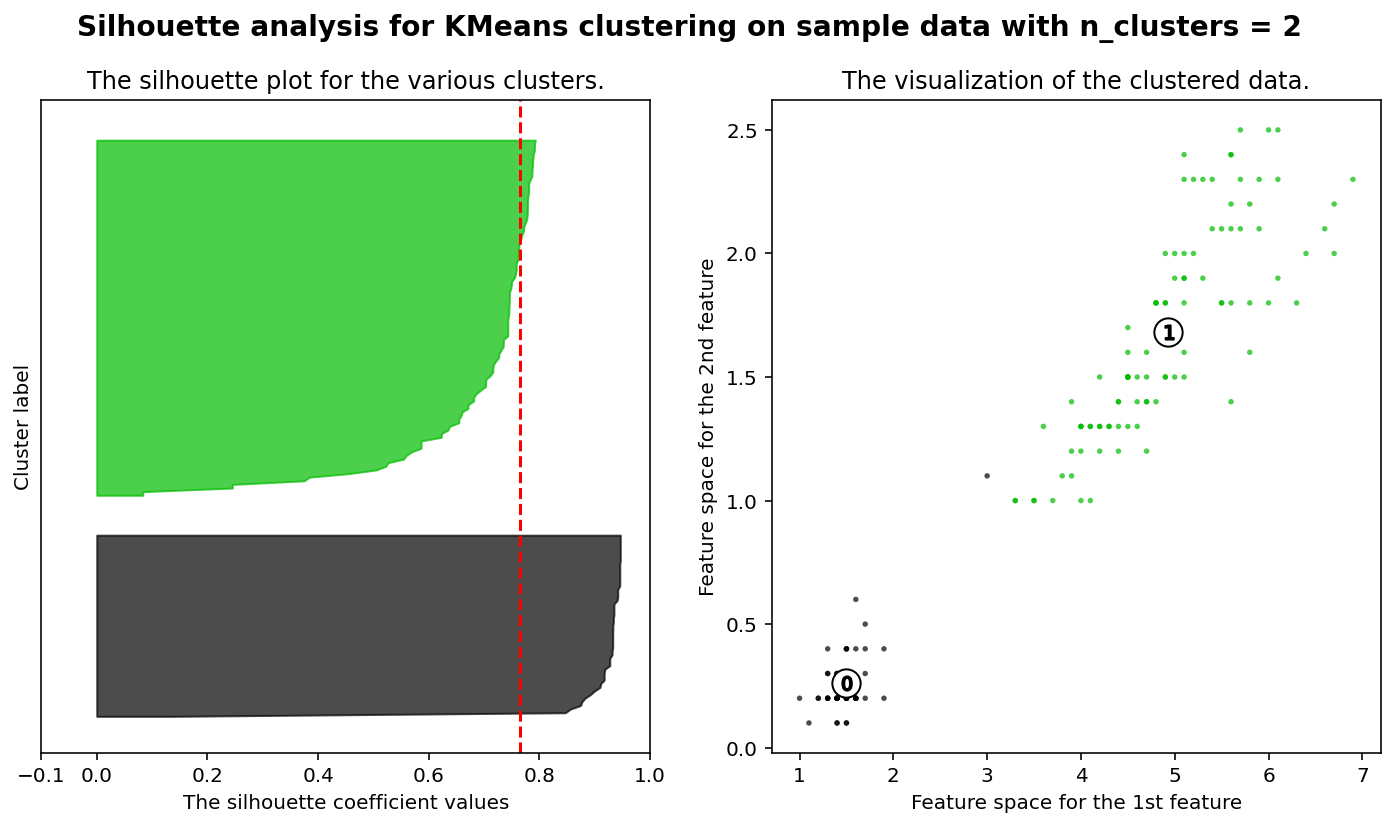

For n_clusters = 3 The average silhouette_score is : 0.6604800083974887


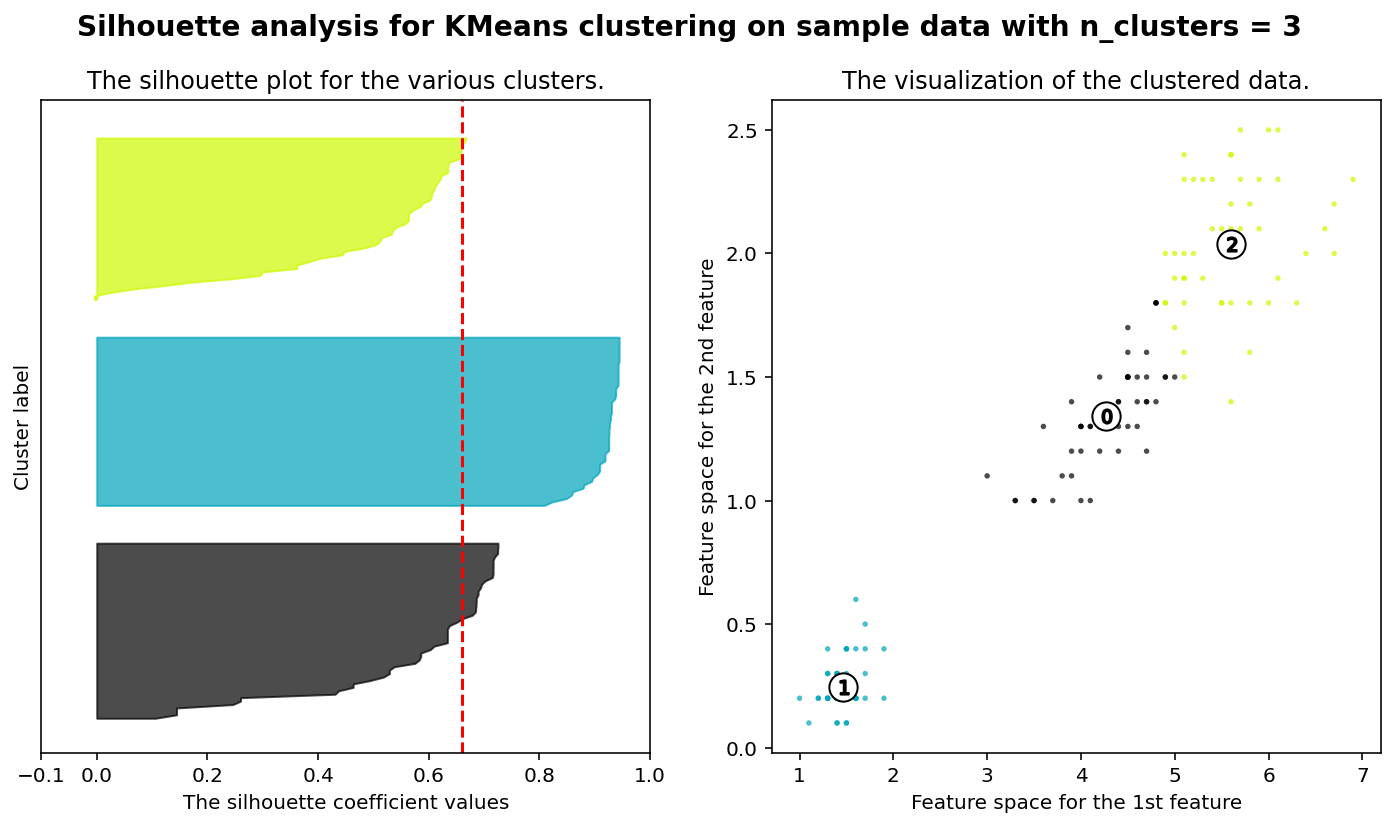

For n_clusters = 4 The average silhouette_score is : 0.6127580794464402


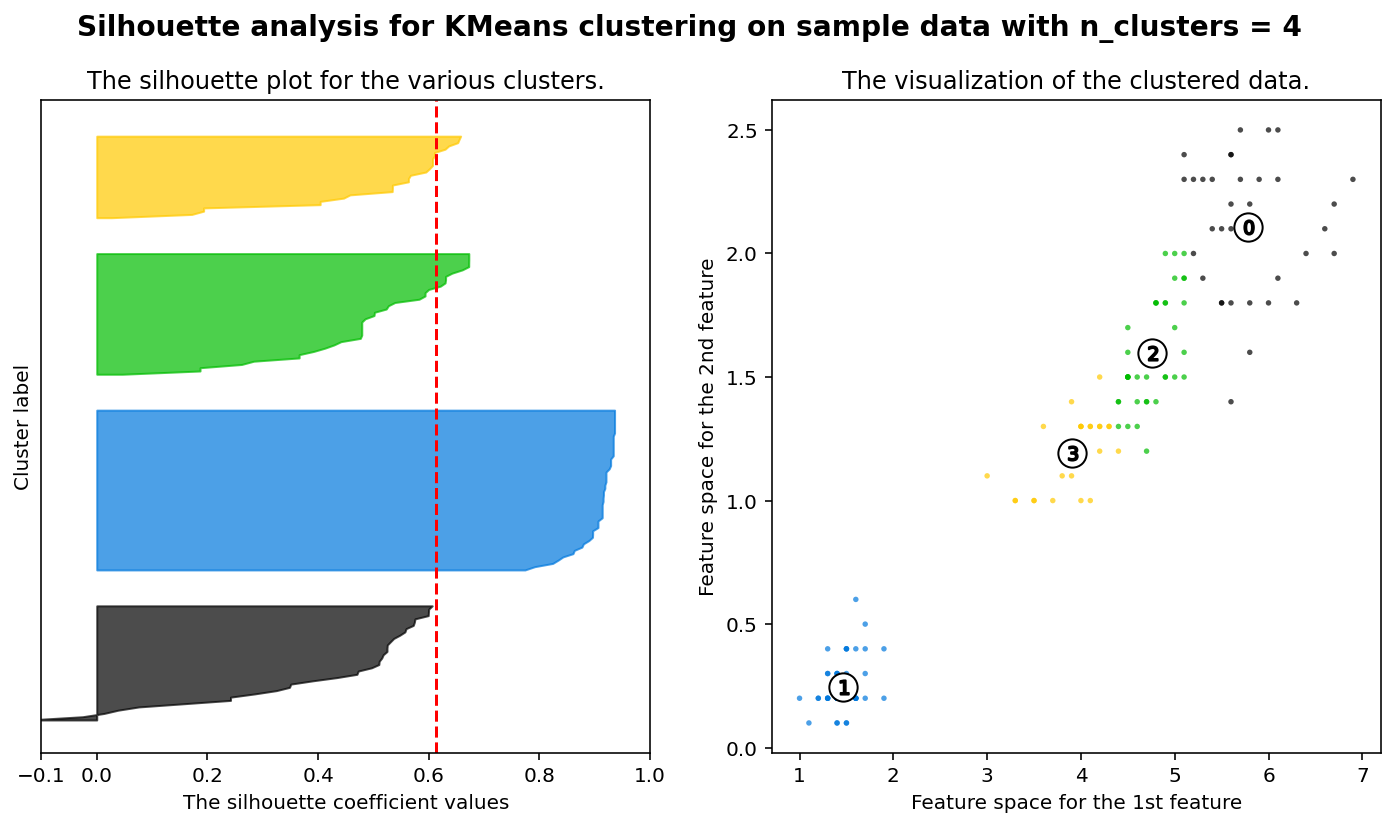

For n_clusters = 5 The average silhouette_score is : 0.5883732712110276


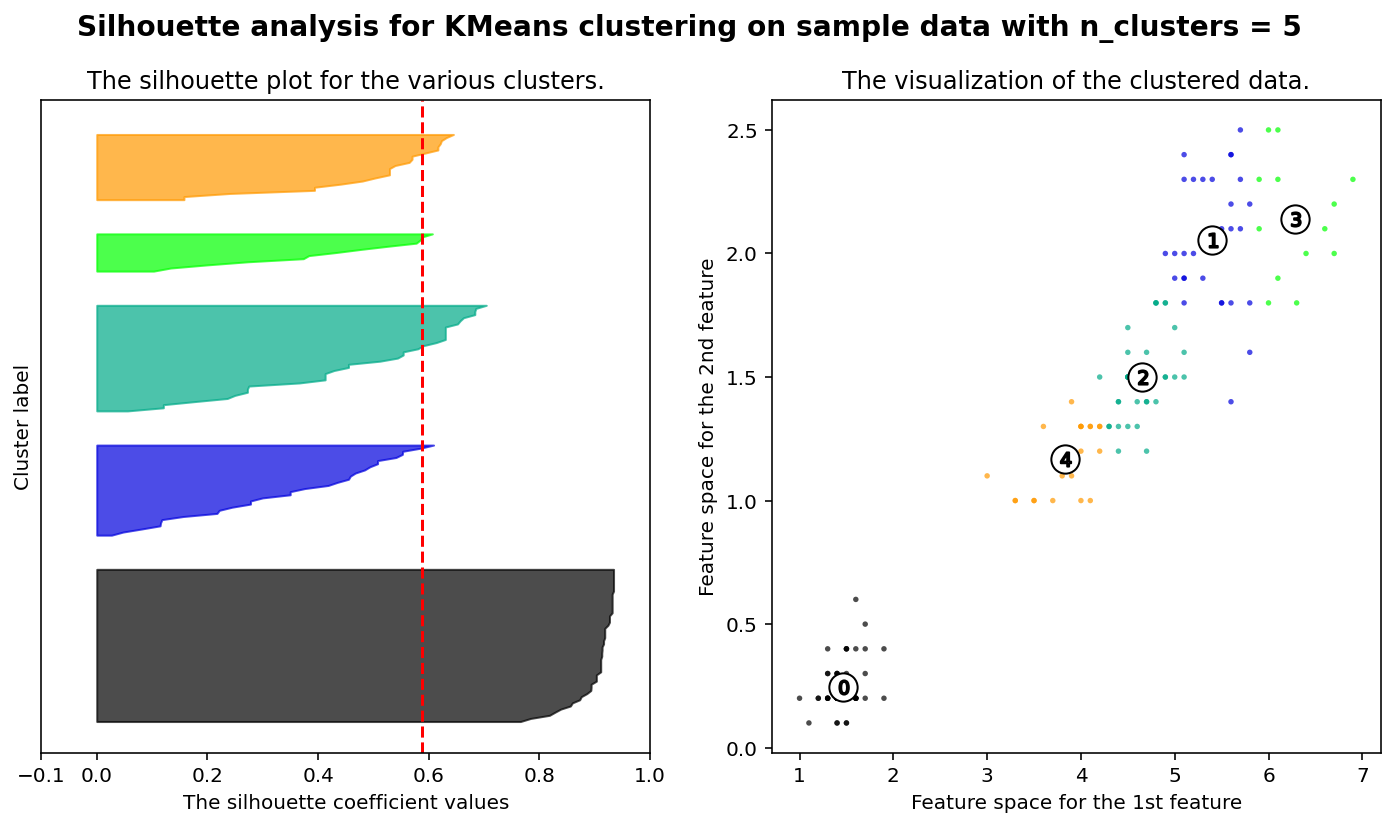

For n_clusters = 6 The average silhouette_score is : 0.5769601940397074


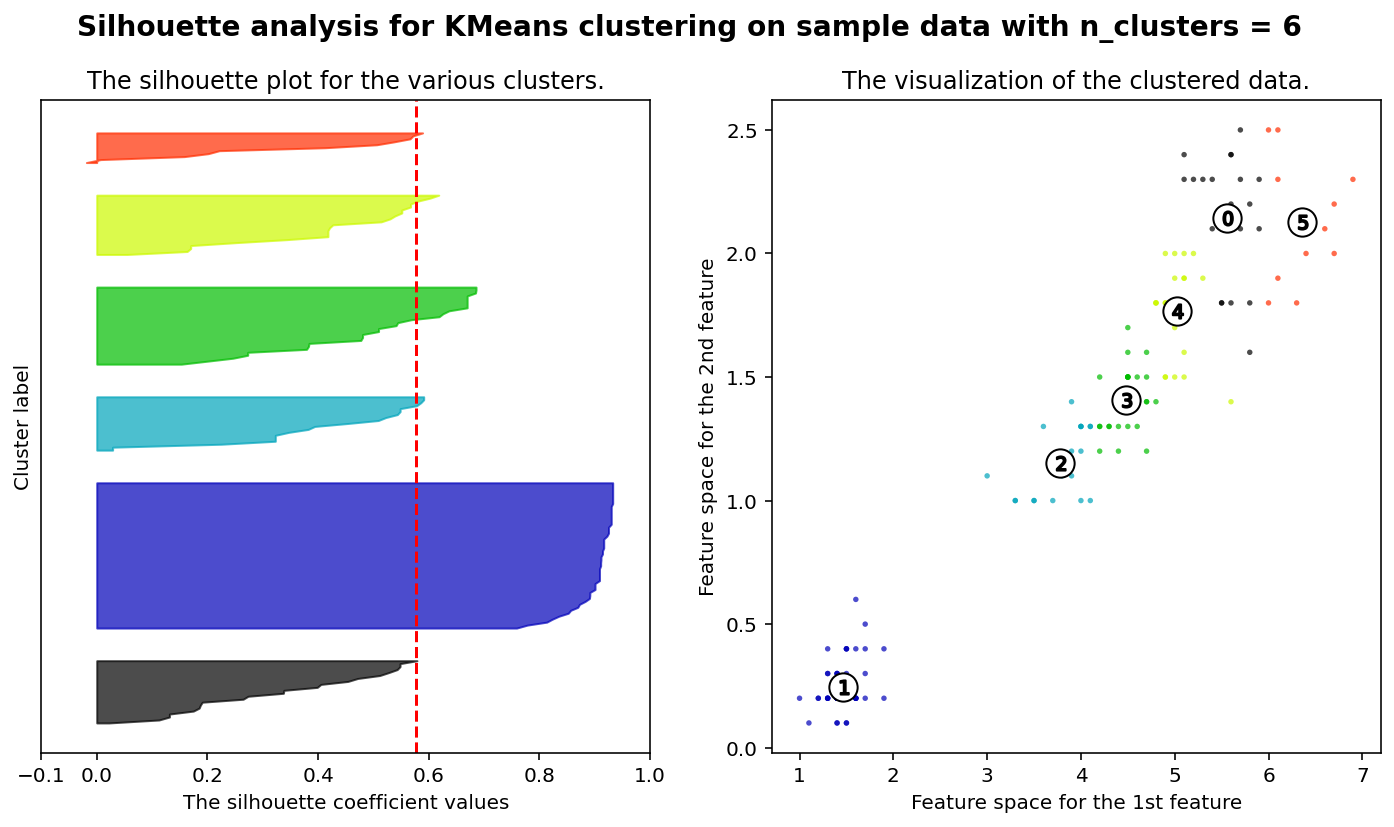

In [81]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import seaborn as sns
iris = sns.load_dataset("iris")
iris_X = iris.loc[:, ["petal_length", "petal_width"]]

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(iris_X) + (n_clusters + 1) * 10])

    # 클러스터의 수만큼 KMeans 모형을 만들고 클러스터를 예측함
    model = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = model.fit_predict(iris_X)

    # 모든 샘플에 대한 실루엣 스코어 평균값을 계산함
    silhouette_avg = silhouette_score(iris_X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # 각 샘플에 대해서 실루엣 스코어를 계산함
    sample_silhouette_values = silhouette_samples(iris_X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 모든 변수의 평균 실루엣 점수를 이용해 수직선을 추가함
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 클러스터 된 산점도 그래프를 그려줌
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], 
                marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # 클러스터 라벨링
    centers = model.cluster_centers_
    # 클러스터 중앙에 태두리가 검정색인 하얀 원을 그림
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

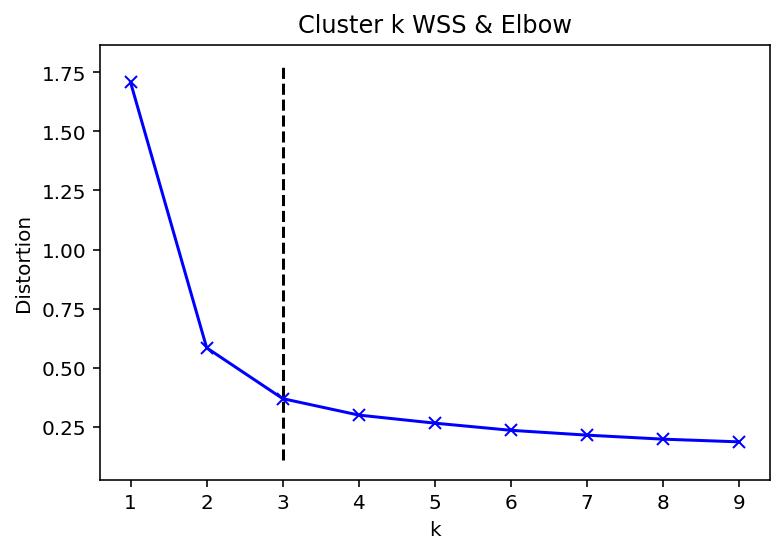

In [82]:
# k means determine k
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
X = iris.loc[:, ["petal_length", "petal_width"]]
x1 = iris.petal_length
x2 = iris.petal_width

distortions = []
K = range(1,10)
for k in K:
    kmeans_model = KMeans(n_clusters=k).fit(X)
    kmeans_model.fit(X)
    euc_dist = cdist(X, kmeans_model.cluster_centers_, 'euclidean')
    distortion = sum(np.min(euc_dist, axis=1)) / X.shape[0]
    distortions.append(distortion)

# pip install kneed
from kneed import KneeLocator
kn = KneeLocator(x=list(K), y=distortions, curve='convex', direction='decreasing')

# 엘보우 그래프
plt.plot(K, distortions, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Cluster k WSS & Elbow')
plt.show()